In [1]:
import os
import cv2

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt 

from skimage.color import rgb2gray, label2rgb
from skimage.measure import label as sk_measure_label
from skimage.measure import regionprops
from skimage.transform import rescale, resize, downscale_local_mean



In [2]:
import intelligent_placer_lib
from intelligent_placer_lib.recognizer import get_mask, get_component_and_areas
from intelligent_placer_lib.recognizer import get_polygon_region, get_objects_regions


Для примера работы реализованных алгоритмов выберем изображение из текущего датасета

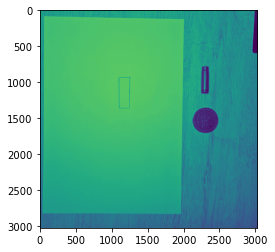

In [3]:
image_file = os.path.join("data", "examples", f'{2}', 'in.jpg')

image_as_gray = rgb2gray(cv2.imread(image_file))
#image_as_gray = image_resized = resize(image_as_gray, (image_as_gray.shape[0] // 4, image_as_gray.shape[1] // 4),
 #                      anti_aliasing=True)

plt.imshow(image_as_gray)

Получим маску

В целом неплохо, но из-за неоднородности фона есть дефеты :C

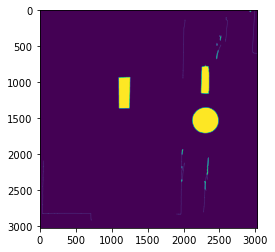

In [4]:
mask = get_mask(image_as_gray)

plt.imshow(mask)

Далее, получим лист областей связности и значение из площадей

Красными многоугольниками выделены области, площадь которых достаточно большая, чтобы понять, что они объекты/многоугольник


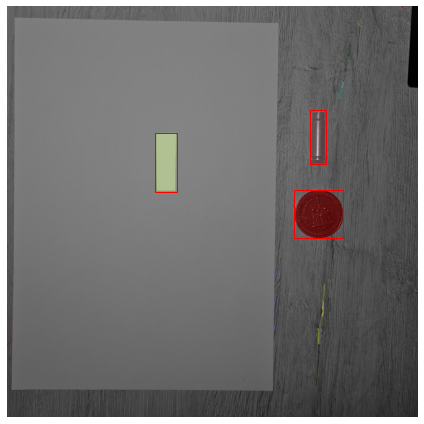

In [5]:
labels, areas = get_component_and_areas(mask)


image_label_overlay = label2rgb(labels, image=image_as_gray, bg_label=0)
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)
for region in regionprops(labels):
    if region.area >= 40000: 
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=1)
        ax.add_patch(rect)
ax.set_axis_off()
plt.tight_layout()
plt.show()


Ищем многоугольник с помощью get_polygon_region как самую левую область и убираем его из листа компонент

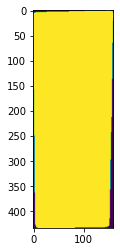

In [7]:
polygon_region = get_polygon_region(labels)
plt.imshow(polygon_region.image)

И все остальное распознанное:

678
852
206
1010
40009
101819
3816


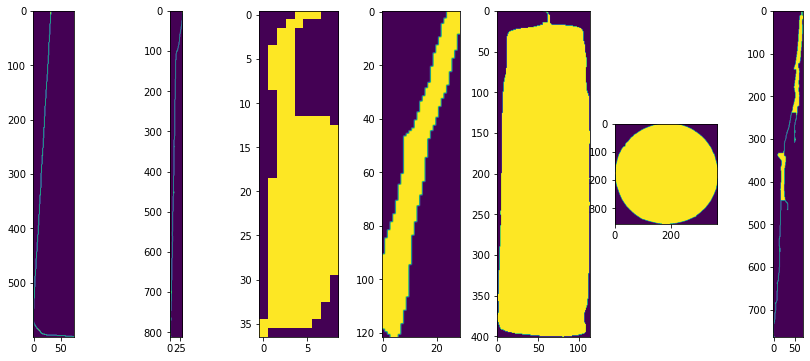

In [9]:
object_regions = get_objects_regions(labels,polygon_region)
fig, ax = plt.subplots(1,len(object_regions), figsize=(15, 6))

for ind, regs in enumerate(object_regions):
    print(regs.area)
    ax[ind].imshow(regs.image)

Гильза и монетка нашлись, все хорошо, но вместе с ними также нашлись артефакты фона

Скорее всего, следует либо улучшить построение маски, либо сохранить маски предметов из папки objects и сравнивать полученные области с ними:

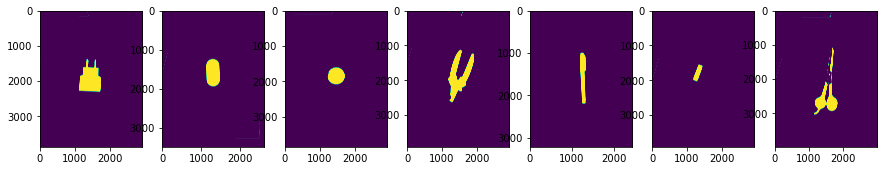

In [12]:
from skimage.io import imread_collection
dirName = 'data/objects/*.jpg'
collection = imread_collection(dirName)

fig, ax = plt.subplots(1,len(collection), figsize=(15, 6))

for i,img in enumerate(collection):
    img = rgb2gray(img)
    img = get_mask(img)
    ax[i].imshow(img)